In [1]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np
import scipy.stats as stats

In [2]:
def corr_plot(slope=1, sd=0, typ='kowariancja', show=False):
    x = np.linspace(0, 10, 100)
    y = slope * x + np.random.normal(0,sd,100)
    fig, axes = plt.subplots(figsize=(6,6))
    plt.scatter(x, y)
    c = np.corrcoef(x, y)[0][1] if typ=="korelacja" else np.cov(x,y)[0][1]
    c = round(c,3)
    title = "c="+str(c) if typ=='kowariancja' else "r="+str(c)
    if show:
        plt.title(title)
    plt.xlim(0,10)
    plt.ylim(-10,10)
    
def corr_examples(example="1", typ='kowariancja', show=False):
    x = np.linspace(1, 10, 100)
    y = -x**3 + np.random.normal(0,100,100) if example=="1" else np.cos(x) + np.random.normal(0,0.1,100)
    plt.scatter(x, y)
    if show:
        if typ=="korelacja":
            plt.title("r="+str(round(np.corrcoef(x, y)[0][1],3)))
        else:
            plt.title("c="+str(round(np.cov(x, y)[0][1],3)))

## Korelacja i regresja liniowa

### Kowariancja

- Kowariancja zmiennych losowych

$$\sigma^2_X = E[(X-\mu)^2]$$

$$\sigma_{X,Y} = E[(X-\mu_x)(Y-\mu_y)]$$

$$\sigma_{X,X} =?$$

- Estymator kowariancji

$$S_{XY}=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$


Przykład:

| X | Y |
| --- | --- |
| 1 | 5 |
| 2 | 6 |
| 3 | 1 |

mx = 

my = 

sxy =

In [3]:
interact(corr_plot, slope=(-1, 1, 0.1), sd=(0,10,1), typ=["kowariancja", "korelacja"])

interactive(children=(FloatSlider(value=1.0, description='slope', max=1.0, min=-1.0), IntSlider(value=0, descr…

<function __main__.corr_plot(slope=1, sd=0, typ='kowariancja', show=False)>

- Kowariancja a niezależność zmiennych

$\;\;\;\;\;E[(X-\mu_x)(Y-\mu_y)] = E[XY - X\mu_Y-Y\mu_X+\mu_X\mu_Y]=E[XY]-E[X\mu_Y]-E[Y\mu_X]+\mu_X\mu_Y=E[XY]-\mu_X\mu_Y$


In [4]:
interact(corr_examples, typ=["kowariancja", "korelacja"], example=["1", "2"])

interactive(children=(Dropdown(description='example', options=('1', '2'), value='1'), Dropdown(description='ty…

<function __main__.corr_examples(example='1', typ='kowariancja', show=False)>

- Własności kowariancji
    - $\sigma_{X,Y} = \sigma_{Y,X}$
    - $\sigma_{X,k} = 0$
    - $\sigma_{kX,Y} = k\sigma_{X,Y}$
    - $\sigma_{X,Y+Z} = \sigma_{X,Y} + \sigma_{X,Z}$ 

### Współczynnik korelacji liniowej Pearsona

- Korelacja zmiennych losowych

$$\rho=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$$

- Estymator współczynnika korelacji

$$r = \frac{S_{XY}}{S_X S_Y} \frac{\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{(\sum_{i=1}^{n}(X_i-\bar{X})^2)(\sum_{i=1}^{n}(Y_i-\bar{Y})^2)}}$$

Przykład c.d.:

$S_X$ = 1

$S_Y$ = 2.646

$r = $

In [5]:
interact(corr_plot, slope=(-1, 1, 0.1), sd=(0,10,1), typ=["kowariancja", "korelacja"])

interactive(children=(FloatSlider(value=1.0, description='slope', max=1.0, min=-1.0), IntSlider(value=0, descr…

<function __main__.corr_plot(slope=1, sd=0, typ='kowariancja', show=False)>

In [6]:
interact(corr_examples, typ=["kowariancja", "korelacja"], example=["1", "2"])

interactive(children=(Dropdown(description='example', options=('1', '2'), value='1'), Dropdown(description='ty…

<function __main__.corr_examples(example='1', typ='kowariancja', show=False)>

### Test na istotność współczynnika korelacji

- Układ hipotez:

$\;\;\;\;\;\;H_0: \rho=0$ 
<br>$\;\;\;\;\;\;H_1: \rho > / \neq / < 0$

- Statystyka:
$$t=\frac{r}{\sqrt{1-r^2}}\sqrt{n-2}~\sim~t(n-2)$$

### Prosta regresja liniowa

In [7]:
interact(corr_plot, slope=(-1, 1, 0.1), sd=(0,10,1), typ=["kowariancja", "korelacja"])

interactive(children=(FloatSlider(value=1.0, description='slope', max=1.0, min=-1.0), IntSlider(value=0, descr…

<function __main__.corr_plot(slope=1, sd=0, typ='kowariancja', show=False)>

$Y = \hat{Y} + \epsilon$

$Y=\beta_0+\beta_1X+\epsilon$

![regresja](http://www.cs.put.poznan.pl/amensfelt/pub/wline_names.png)

Założenia:

- Zależność liniowa między X i Y
- Wartości zmiennej niezależnej X są ustalone
-  $\epsilon  \sim  N(0,\sigma^2)$

### Metoda najmniejszych kwadratów

$Y=b_0+b_1X+e$

$\hat{Y}=b_0+b_1X$

$e_i=y_i-\hat{y_i}$

![mnk](http://www.cs.put.poznan.pl/amensfelt/pub/wline_mnk.png)

- Suma kwadratów rezyduów

$$S(b_0,b_1) = \sum\limits_{i=1}^n (y_i-\hat{y_i})^2 =  \sum\limits_{i=1}^n(y_i-(b_1x_i+b_0))^2$$

- Wyraz wolny

$$b_0= \bar{y}-b_1\bar{x}$$

- Współczynnik kierunkowy

$$b_1 =\frac{s_{xy}}{s^2_x} = r\frac{S_Y}{S_X}$$

- prosta regresji przechodzi przez $(\bar{x}, \bar{y})$

- znak($b_1$) = znak($r$)

Przykład c.d. 2:

b1 = 

b0 = 


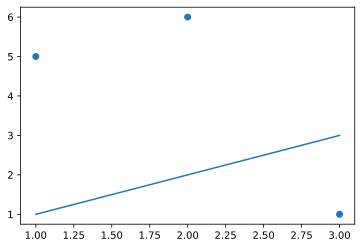

In [8]:
x = np.array([1,2,3])
y = np.array([5,6,1])
plt.scatter(x, y)
a = 1 #TODO
b = 0 #TODO
plt.plot(x, x*a+b)

### Kwartet Anscombe’a

![kwartet](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1000px-Anscombe%27s_quartet_3.svg.png)

[Źródło](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)